In [10]:
pip install seaborn

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [11]:

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


df = pd.read_csv("../../data/nigerian-songs.csv")
df.head()

name                         album  \
0                    Sparky            Mandy & The Jungle   
1                shuga rush  EVERYTHING YOU HEARD IS TRUE   
2                     LITT!                         LITT!   
3  Confident / Feeling Cool               Enjoy Your Life   
4                wanted you                         rare.   

                artist artist_top_genre  release_date  length  popularity  \
0        Cruel Santino  alternative r&b          2019  144000          48   
1  Odunsi (The Engine)          afropop          2020   89488          30   
2                 AYLØ        indie r&b          2018  207758          40   
3           Lady Donli     nigerian pop          2019  175135          14   
4  Odunsi (The Engine)          afropop          2018  152049          25   

   danceability  acousticness  energy  instrumentalness  liveness  loudness  \
0         0.666        0.8510   0.420          0.534000    0.1100    -6.699   
1         0.710        0.0822   0.683          0.000169    0.1010    -5.640   
2         0.836        0.2720   0.564          0.000537    0.1100    -7.127   
3         0.894        0.7980   0.611          0.000187    0.0964    -4.961   
4         0.702        0.1160   0.833          0.910000    0.3480    -6.044   

   speechiness    tempo  time_signature  
0       0.0829  133.015               5  
1       0.3600  129.993               3  
2       0.0424  130.005               4  
3       0.1130  111.087               4  
4       0.0447  105.115               4

आम्ही फक्त ३ प्रकारांवर लक्ष केंद्रित करू. कदाचित आपण ३ गट तयार करू शकू!


Text(0.5, 1.0, 'Top genres')

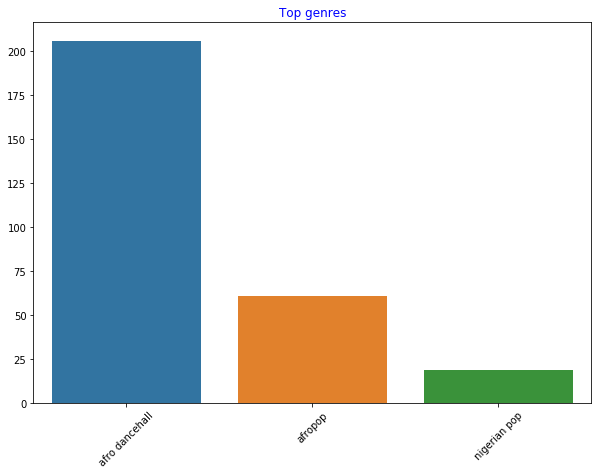

In [12]:
df = df[(df['artist_top_genre'] == 'afro dancehall') | (df['artist_top_genre'] == 'afropop') | (df['artist_top_genre'] == 'nigerian pop')]
df = df[(df['popularity'] > 0)]
top = df['artist_top_genre'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=top.index,y=top.values)
plt.xticks(rotation=45)
plt.title('Top genres',color = 'blue')

In [13]:
df.head()

name                         album  \
1                shuga rush  EVERYTHING YOU HEARD IS TRUE   
3  Confident / Feeling Cool               Enjoy Your Life   
4                wanted you                         rare.   
5                    Kasala                      Pioneers   
6                   Pull Up             Everything Pretty   

                artist artist_top_genre  release_date  length  popularity  \
1  Odunsi (The Engine)          afropop          2020   89488          30   
3           Lady Donli     nigerian pop          2019  175135          14   
4  Odunsi (The Engine)          afropop          2018  152049          25   
5          DRB Lasgidi     nigerian pop          2020  184800          26   
6          prettyboydo     nigerian pop          2018  202648          29   

   danceability  acousticness  energy  instrumentalness  liveness  loudness  \
1         0.710        0.0822   0.683          0.000169    0.1010    -5.640   
3         0.894        0.7980   0.611          0.000187    0.0964    -4.961   
4         0.702        0.1160   0.833          0.910000    0.3480    -6.044   
5         0.803        0.1270   0.525          0.000007    0.1290   -10.034   
6         0.818        0.4520   0.587          0.004490    0.5900    -9.840   

   speechiness    tempo  time_signature  
1       0.3600  129.993               3  
3       0.1130  111.087               4  
4       0.0447  105.115               4  
5       0.1970  100.103               4  
6       0.1990   95.842               4

डेटा किती स्वच्छ आहे? बॉक्स प्लॉट्स वापरून बाह्य घटक तपासा. आम्ही कमी बाह्य घटक असलेल्या स्तंभांवर लक्ष केंद्रित करू (जरी तुम्ही बाह्य घटक साफ करू शकता). बॉक्स प्लॉट्स डेटा श्रेणी दर्शवू शकतात आणि कोणते स्तंभ वापरायचे ते निवडण्यास मदत करतील. लक्षात ठेवा, बॉक्स प्लॉट्स व्हेरियन्स दर्शवत नाहीत, जे चांगल्या क्लस्टरेबल डेटाचे एक महत्त्वाचे घटक आहे (https://stats.stackexchange.com/questions/91536/deduce-variance-from-boxplot)


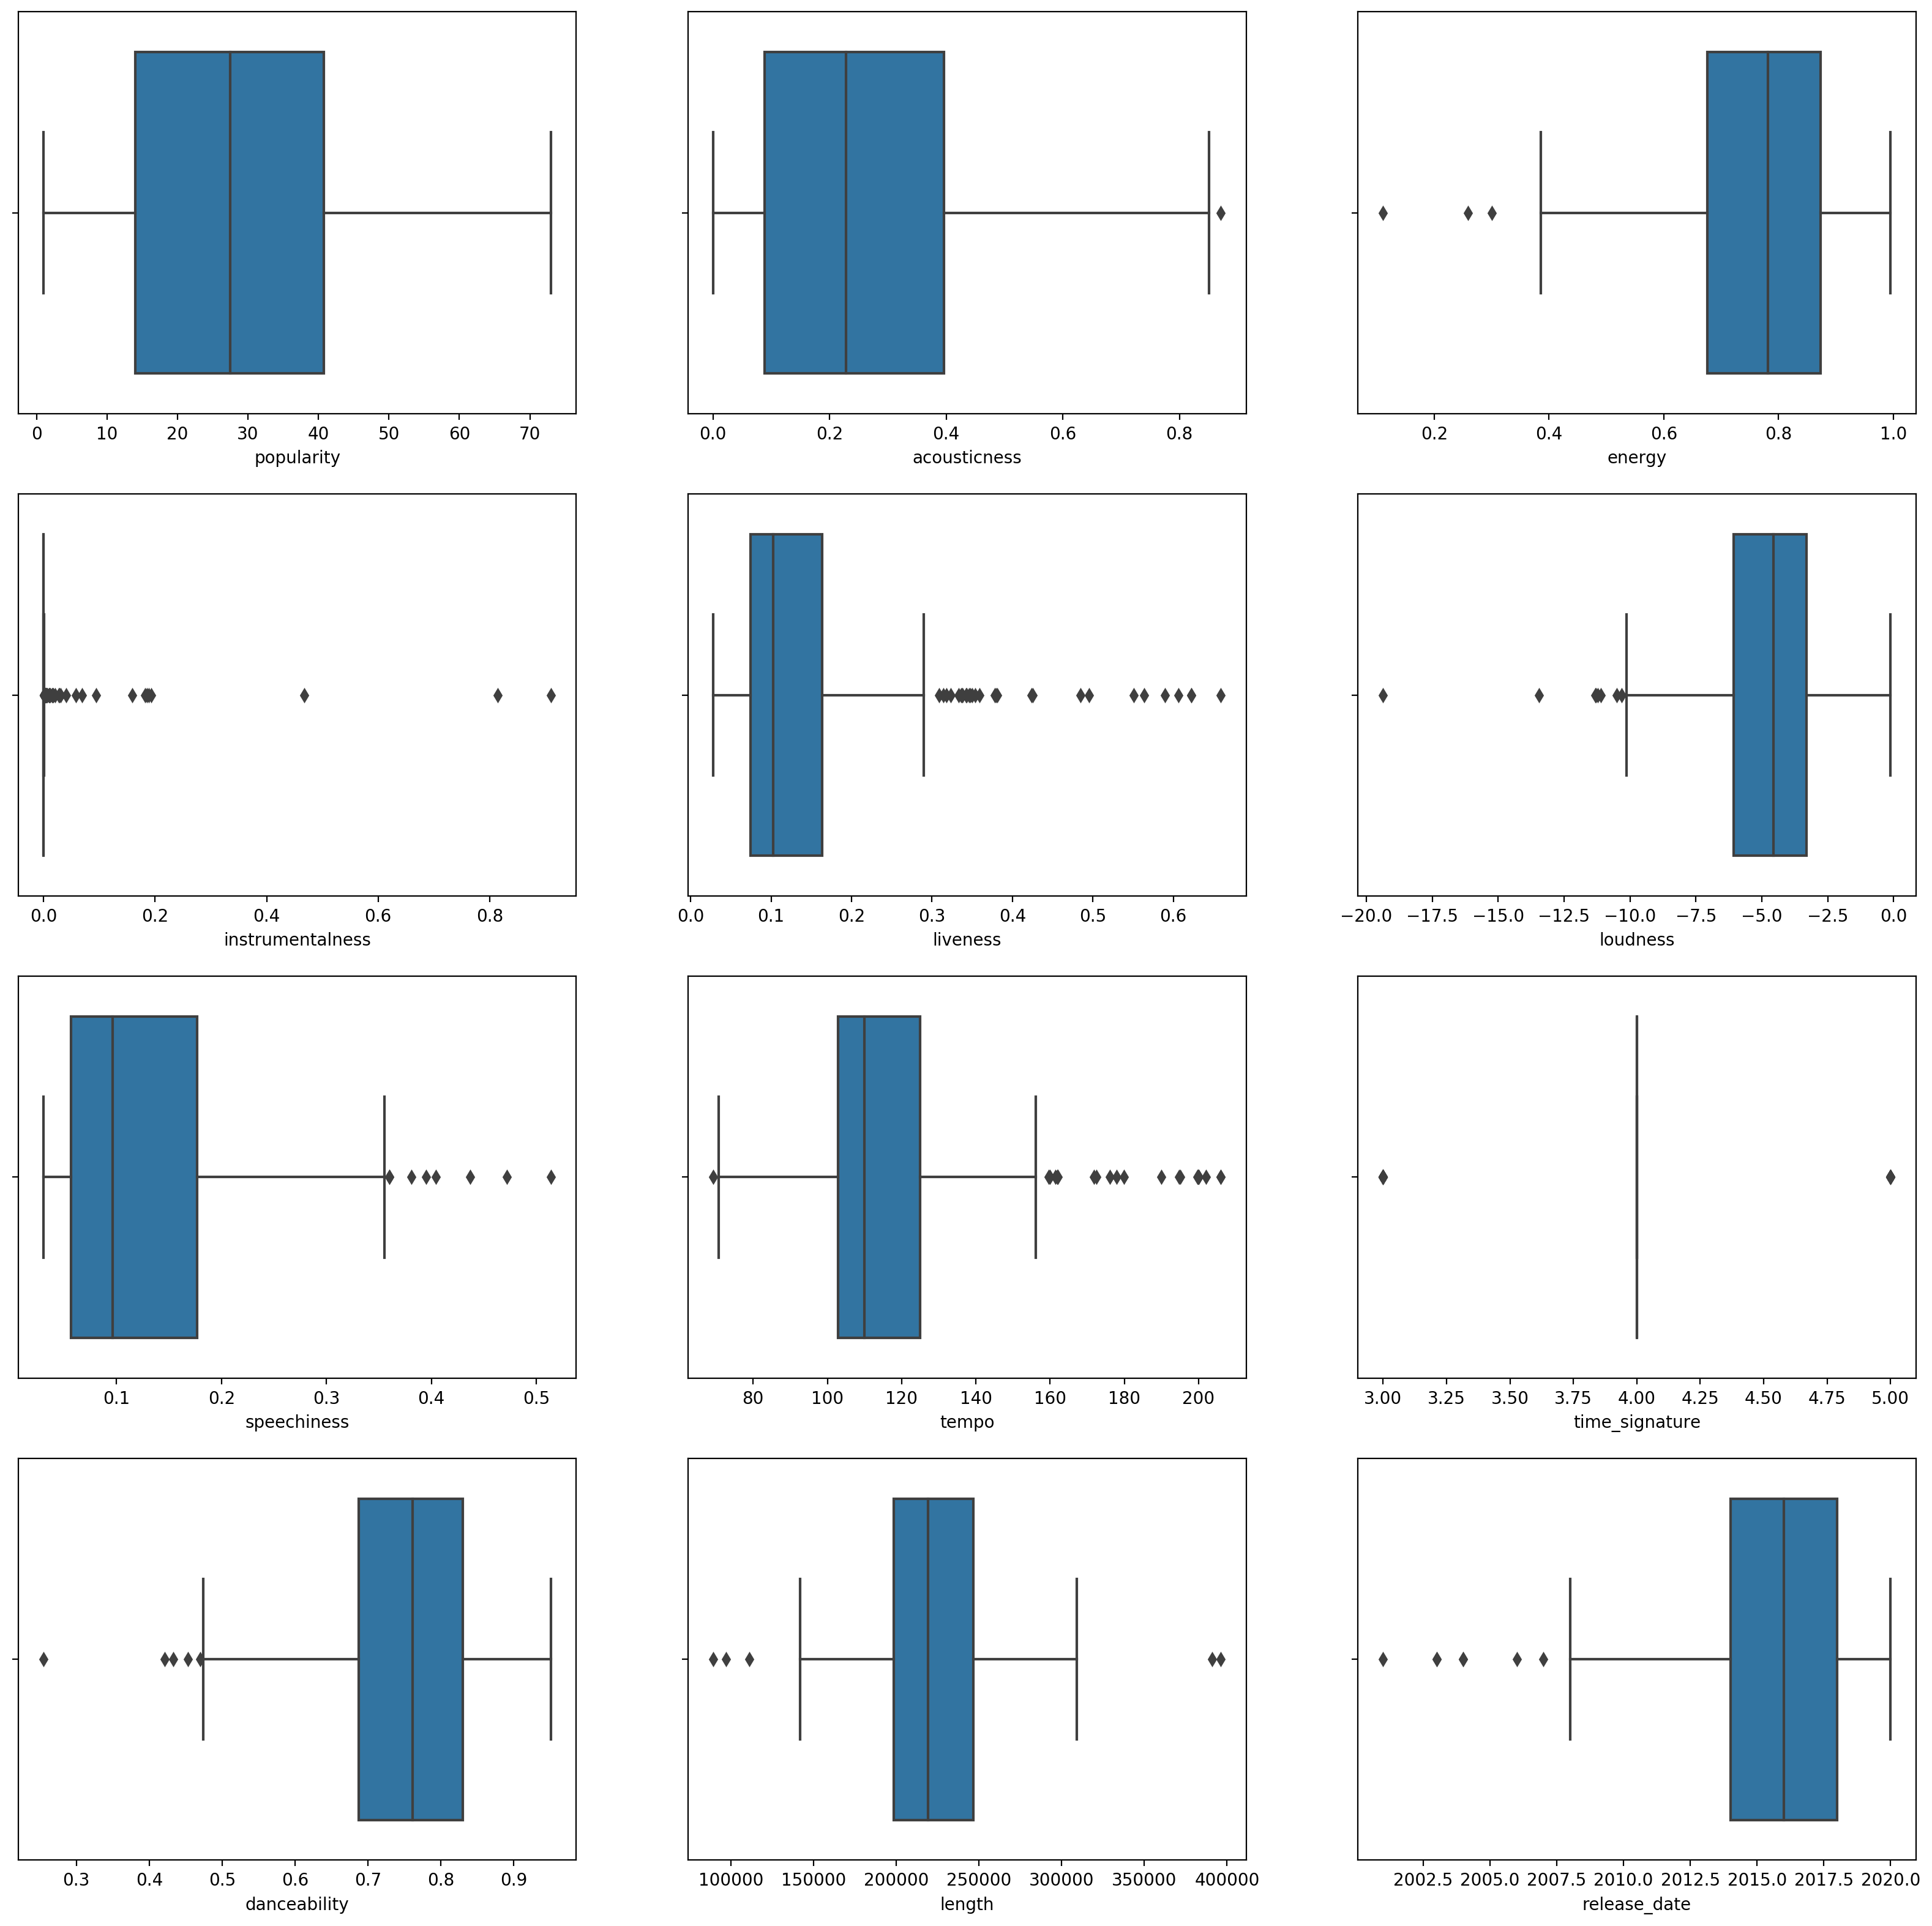

In [14]:
plt.figure(figsize=(20,20), dpi=200)

plt.subplot(4,3,1)
sns.boxplot(x = 'popularity', data = df)

plt.subplot(4,3,2)
sns.boxplot(x = 'acousticness', data = df)

plt.subplot(4,3,3)
sns.boxplot(x = 'energy', data = df)

plt.subplot(4,3,4)
sns.boxplot(x = 'instrumentalness', data = df)

plt.subplot(4,3,5)
sns.boxplot(x = 'liveness', data = df)

plt.subplot(4,3,6)
sns.boxplot(x = 'loudness', data = df)

plt.subplot(4,3,7)
sns.boxplot(x = 'speechiness', data = df)

plt.subplot(4,3,8)
sns.boxplot(x = 'tempo', data = df)

plt.subplot(4,3,9)
sns.boxplot(x = 'time_signature', data = df)

plt.subplot(4,3,10)
sns.boxplot(x = 'danceability', data = df)

plt.subplot(4,3,11)
sns.boxplot(x = 'length', data = df)

plt.subplot(4,3,12)
sns.boxplot(x = 'release_date', data = df)

In [15]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()

# scaler = StandardScaler()

X = df.loc[:, ('artist_top_genre','popularity','danceability','acousticness','loudness','energy')]

y = df['artist_top_genre']

X['artist_top_genre'] = le.fit_transform(X['artist_top_genre'])

# X = scaler.fit_transform(X)

y = le.transform(y)



In [16]:

from sklearn.cluster import KMeans

nclusters = 3 
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X)

# Predict the cluster for each data point

y_cluster_kmeans = km.predict(X)
y_cluster_kmeans

array([2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 0, 2, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 2, 0, 0, 2, 2, 1, 1, 0, 2, 2, 2, 2, 1, 1, 0, 2, 0, 2, 0,
       2, 0, 0, 1, 1, 2, 1, 0, 0, 2, 2, 2, 2, 1, 1, 0, 1, 2, 2, 1, 2, 2,
       1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 0, 2, 1, 1, 1, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 0,
       1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 1, 1, 0, 1, 2, 1, 2,
       1, 2, 2, 2, 0, 2, 1, 1, 1, 2, 1, 0, 1, 2, 2, 1, 1, 1, 0, 1, 2, 2,
       2, 1, 1, 0, 1, 2, 1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2,
       0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 1, 1, 2, 0, 2, 2, 0, 2, 2, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 2, 0, 1, 0, 2, 0, 0, 2, 2, 2, 1, 1, 1, 1, 1, 0,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 1, 0, 2, 2, 2,
       1, 1, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 1, 1, 1, 2, 2, 2,
       1, 2, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 0, 1, 2, 1, 1, 1, 2, 1],
      dtype=int32)

ते आकडे आमच्यासाठी फारसे महत्त्वाचे नाहीत, त्यामुळे अचूकता पाहण्यासाठी 'सिल्हूट स्कोअर' मिळवूया. आमचा स्कोअर मध्यम आहे.


In [17]:
from sklearn import metrics
score = metrics.silhouette_score(X, y_cluster_kmeans)
score

0.5466747351275563

In [19]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

त्या मॉडेलचा वापर करून, एल्बो पद्धतीचा उपयोग करून, तयार करण्यासाठी क्लस्टर्सची सर्वोत्तम संख्या ठरवा


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


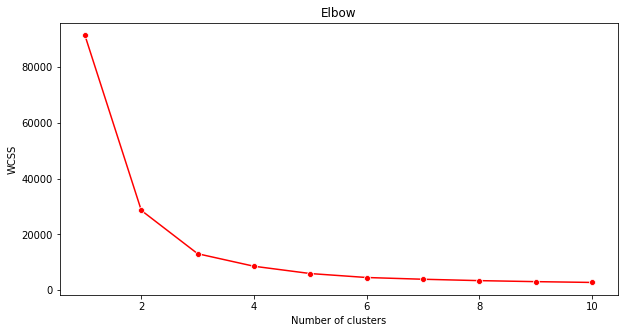

In [20]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('Elbow')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
Looks like 3 is a good number after all. Fit the model again and create a scatterplot of your clusters. They do group in bunches, but they are pretty close together.

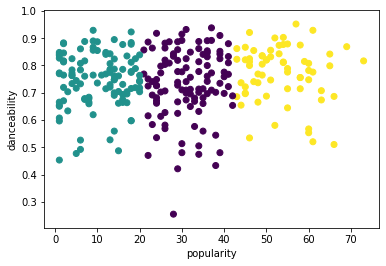

In [21]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)
labels = kmeans.predict(X)
plt.scatter(df['popularity'],df['danceability'],c = labels)
plt.xlabel('popularity')
plt.ylabel('danceability')
plt.show()

या मॉडेलची अचूकता वाईट नाही, पण उत्कृष्टही नाही. कदाचित डेटा K-Means क्लस्टरिंगसाठी योग्य नसावा. तुम्ही वेगळा पद्धत वापरून पाहू शकता.


In [811]:
labels = kmeans.labels_

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 109 out of 286 samples were correctly labeled.
Accuracy score: 0.38



---

**अस्वीकरण**:  
हा दस्तऐवज AI भाषांतर सेवा [Co-op Translator](https://github.com/Azure/co-op-translator) वापरून भाषांतरित करण्यात आला आहे. आम्ही अचूकतेसाठी प्रयत्नशील असलो तरी, कृपया लक्षात ठेवा की स्वयंचलित भाषांतरांमध्ये त्रुटी किंवा अचूकतेचा अभाव असू शकतो. मूळ भाषेतील दस्तऐवज हा अधिकृत स्रोत मानला जावा. महत्त्वाच्या माहितीसाठी व्यावसायिक मानवी भाषांतराची शिफारस केली जाते. या भाषांतराचा वापर करून उद्भवलेल्या कोणत्याही गैरसमज किंवा चुकीच्या अर्थासाठी आम्ही जबाबदार राहणार नाही.
